In [1]:
# Working perfectly 3 8 12 14

# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import re
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Setup function to detect car plate
def carplate_detect(image, carplate_haar_cascade):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

    cv2.imwrite("result.png", image)

def carplate_extract(image, carplate_haar_cascade):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img_extract = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img_extract

def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image


def convertToText(carplate_img):
    #Detection  
    carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

    carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    detected_carplate_img = carplate_detect(carplate_img_rgb, carplate_haar_cascade)
    enlarge_plt_display(detected_carplate_img, 1.2) 


    #OCR
    carplate_extract_img = carplate_extract(carplate_img_rgb, carplate_haar_cascade)
    carplate_extract_img = enlarge_img(carplate_extract_img, 150)
    carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
    carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3

    text = pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                    config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')


    print("text : ", text)
    text = re.sub('[^A-Za-z0-9]+', '', text)
    return text

# carplate_img = cv2.imread('Cars19.png')
# print(convertToText(carplate_img))

ModuleNotFoundError: No module named 'pytesseract'

text :  0200163

0200163


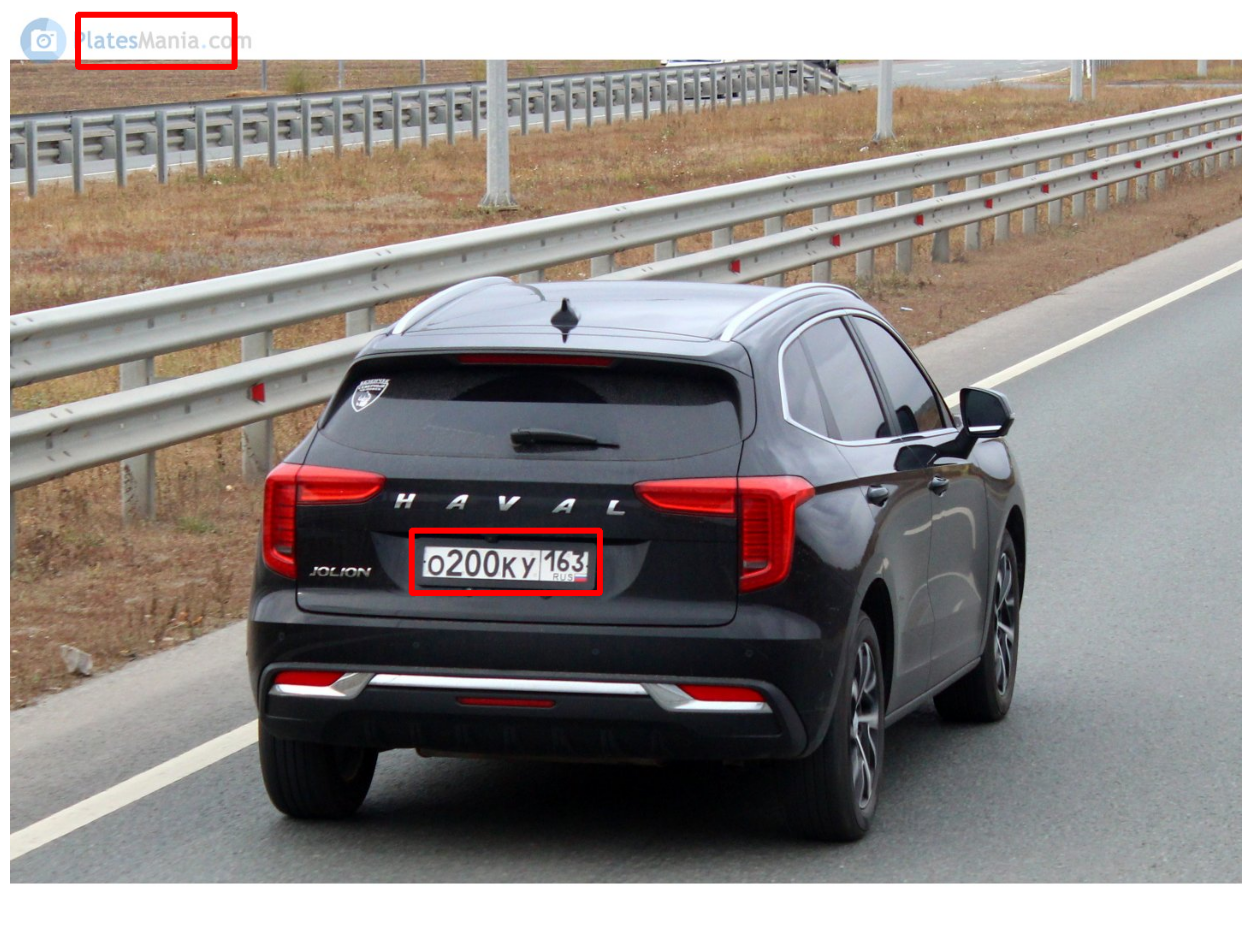

In [7]:
carplate_img = cv2.imread('img/26417135.jpg')
print(convertToText(carplate_img))

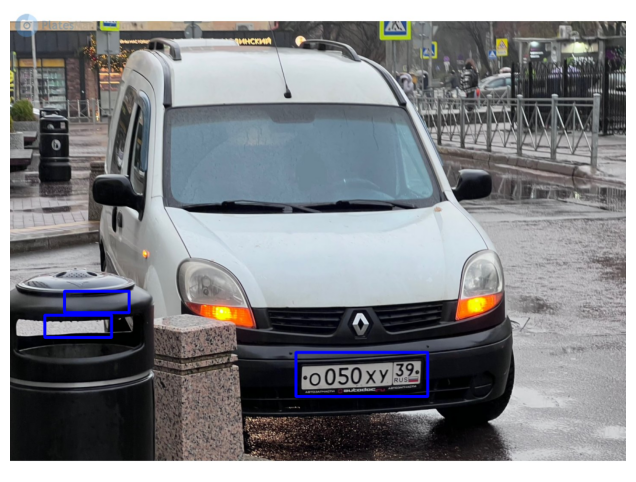

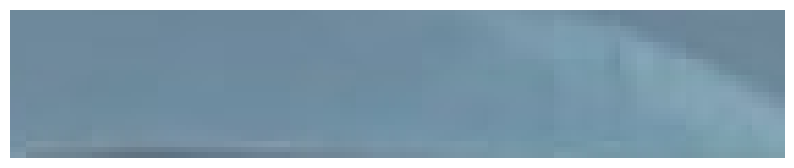

In [31]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Resize image for display
def resize_for_display(image, max_width=1000, max_height=1000):
    height, width = image.shape[:2]
    if width > max_width or height > max_height:
        scale = min(max_width / width, max_height / height)
        new_width = int(width * scale)
        new_height = int(height * scale)
        image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return image

# Setup function to detect car plate
def carplate_detect(image, carplate_haar_cascade):
    carplate_overlay = image.copy()  # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay, scaleFactor=1.1, minNeighbors=5)

    for x, y, w, h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x, y), (x + w, y + h), (255, 0, 0), 5)
        
    return carplate_overlay

# Display image with resizing to avoid oversized figures
def display_image(image, max_width=1000, max_height=1000):
    resized_image = resize_for_display(image, max_width, max_height)
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

# Extract car plate region
def carplate_extract(image, carplate_haar_cascade):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,  scaleFactor=1.1, minNeighbors=1, minSize=(40, 40))

    for x, y, w, h in carplate_rects: 
        carplate_img_extract = image[y + 15:y + h - 10, x + 15:x + w - 20]
        
    return carplate_img_extract

# Resize image for further processing
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image

# Process and display car plate image
def process_carplate_image(carplate_img_path, haar_cascade_path):
    carplate_img = cv2.imread(carplate_img_path)
    if carplate_img is None:
        raise IOError(f"Image at {carplate_img_path} not found.")
    
    carplate_haar_cascade = cv2.CascadeClassifier(haar_cascade_path)
    if carplate_haar_cascade.empty():
        raise IOError("Error loading cascade classifier. Please check the path.")

    # Detect car plate
    detected_carplate_img = carplate_detect(carplate_img, carplate_haar_cascade)
    display_image(detected_carplate_img)

    # Extract and display car plate region
    carplate_extract_img = carplate_extract(carplate_img, carplate_haar_cascade)
    carplate_extract_img = enlarge_img(carplate_extract_img, 150)
    display_image(carplate_extract_img)

# Example usage
process_carplate_image('img/car3.jpg', 'data/haarcascade_russian_plate_number.xml')


In [25]:
import cv2

# Загрузка каскада для распознавания номерных знаков
cascade_path = 'data/haarcascade_russian_plate_number1.xml'
plate_cascade = cv2.CascadeClassifier(cascade_path)

# Проверка корректности загрузки каскада
if plate_cascade.empty():
    result = "Ошибка загрузки каскада!"
else:
    # Загрузка изображения
    image_path = 'img/car2.jpg'
    image = cv2.imread(image_path)

    # Преобразование изображения в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаружение номерных знаков
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1, minSize=(40, 40))

    # Выделение найденных номерных знаков на изображении
    if len(plates) > 0:
        for (x, y, w, h) in plates:
            # Обрезка области номерного знака
            cropped_plate = image[y:y+h, x:x+w]
            cropped_image_path = 'cropped_plate.jpg'
            cv2.imwrite(cropped_image_path, cropped_plate)
    cv2.imshow('Обнаружение номерного знака', cropped_plate)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
cropped_plate = None

In [22]:
from ultralytics import YOLO

model1 = YOLO("yolo11n-obb1.pt")

results1 = model1.train(data="dataset-yolo8obb/data.yaml", epochs=40, imgsz=640)

Ultralytics 8.3.39  Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=obb, mode=train, model=yolo11n-obb1.pt, data=dataset-yolo8obb/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels...:   0%|          | 0/978 [00:00<?, ?it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels... 46 images, 0 backgrounds, 0 corrupt:   5%|▍         | 46/978 [00:00<00:02, 446.19it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels... 115 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 115/978 [00:00<00:01, 584.10it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels... 174 images, 3 backgrounds, 0 corrupt:  18%|█▊        | 174/978 [00:00<00:01, 549.27it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels... 230 images, 6 backgrounds, 0 corrupt:  24%|██▎       | 230/978 [00:00<00:01, 538.91it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels... 304 images, 27 backgrounds, 0 corrupt:  31%|███       | 3

train: New cache created: C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\train\labels.cache


val: Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels...:   0%|          | 0/86 [00:00<?, ?it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels... 25 images, 1 backgrounds, 0 corrupt:  29%|██▉       | 25/86 [00:00<00:00, 225.08it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels... 53 images, 2 backgrounds, 0 corrupt:  62%|██████▏   | 53/86 [00:00<00:00, 253.92it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels... 82 images, 6 backgrounds, 0 corrupt:  95%|█████████▌| 82/86 [00:00<00:00, 268.62it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels... 86 images, 7 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<00:00, 260.91it/s]


val: New cache created: C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo8obb\valid\labels.cache
Plotting labels to runs\obb\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\obb\train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.76G      1.417     0.9024      2.795          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]


                   all         86         85      0.922      0.977      0.983      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       2.5G     0.9859     0.5919      2.483          3        640: 100%|██████████| 62/62 [00:07<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.13it/s]


                   all         86         85      0.966      0.998      0.993      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.47G     0.8825     0.5739      2.466          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.08it/s]


                   all         86         85      0.973      0.976       0.99      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.47G     0.8594     0.5557      2.402          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.08it/s]


                   all         86         85      0.987          1      0.992      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.46G     0.8171      0.532      2.323          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.06it/s]


                   all         86         85      0.988      0.987      0.987      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.47G     0.8318     0.5435      2.304          4        640: 100%|██████████| 62/62 [00:06<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.61it/s]


                   all         86         85      0.988      0.976      0.987       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.46G     0.8094     0.5355      2.214          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.39it/s]


                   all         86         85      0.988      0.988      0.994      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.47G     0.8011     0.5398      2.212          6        640: 100%|██████████| 62/62 [00:06<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.57it/s]


                   all         86         85      0.988      0.963      0.986      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.46G     0.7838     0.5157      2.145          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.33it/s]


                   all         86         85      0.986      0.976      0.989      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.47G      0.777     0.5086      2.139          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.27it/s]


                   all         86         85      0.988      0.973      0.988      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.46G     0.7478     0.4966       2.13          4        640: 100%|██████████| 62/62 [00:06<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.61it/s]


                   all         86         85      0.974      0.976      0.988      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.47G     0.7394     0.4889      2.084          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.02it/s]


                   all         86         85      0.986      0.976      0.988      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.46G     0.7649      0.585      2.102          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.33it/s]


                   all         86         85      0.988      0.995      0.994      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.47G     0.7371     0.4955      2.118          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.42it/s]


                   all         86         85      0.986      0.976      0.987      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.46G      0.707      0.476      2.091          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.38it/s]


                   all         86         85      0.988      0.986      0.989      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.47G     0.7257     0.4896      2.082          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.05it/s]


                   all         86         85      0.988      0.988      0.988      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.46G     0.6905     0.4736      2.054          6        640: 100%|██████████| 62/62 [00:06<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.94it/s]


                   all         86         85      0.985      0.988      0.989      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.47G     0.6737     0.4596      2.047          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.01it/s]


                   all         86         85      0.988      0.975      0.989      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.46G     0.6846     0.4535      2.027          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.63it/s]


                   all         86         85      0.988      0.976      0.989      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.47G     0.6712     0.4394      2.033          4        640: 100%|██████████| 62/62 [00:06<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.64it/s]


                   all         86         85      0.987      0.976      0.987      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.46G     0.7038     0.5231      1.992          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.84it/s]


                   all         86         85      0.986      0.976      0.989      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.47G      0.649     0.4409      2.018          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.74it/s]


                   all         86         85      0.975      0.976      0.989       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.46G     0.6147     0.4151       2.06          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.82it/s]


                   all         86         85      0.988      0.988      0.989      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.47G     0.6579      0.438      1.984          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.44it/s]


                   all         86         85      0.987      0.976      0.989      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.46G     0.6414       0.43       1.98          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.78it/s]


                   all         86         85      0.988      0.974      0.989      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.47G     0.6217     0.4282      2.012          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.66it/s]


                   all         86         85      0.987      0.988      0.991      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.46G     0.6309     0.4295      2.007          3        640: 100%|██████████| 62/62 [00:06<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.68it/s]


                   all         86         85      0.988      0.988      0.991      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.47G     0.6248     0.4343      1.992          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.26it/s]


                   all         86         85      0.985      0.988       0.99      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.46G     0.6181     0.4243      1.995          1        640: 100%|██████████| 62/62 [00:06<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.13it/s]


                   all         86         85      0.988      0.987      0.989      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.47G     0.6217      0.422      1.931          4        640: 100%|██████████| 62/62 [00:06<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.31it/s]


                   all         86         85      0.987      0.976      0.984      0.855
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.59G     0.5429     0.3744      1.989          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.01it/s]


                   all         86         85      0.987      0.988      0.989      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.47G     0.5562     0.3759      1.988          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.27it/s]


                   all         86         85      0.987      0.988       0.99      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.46G     0.5417     0.3629      1.986          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.80it/s]


                   all         86         85      0.987      0.988       0.99      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.47G     0.5255     0.3612      1.996          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.33it/s]


                   all         86         85      0.987      0.988      0.991      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.46G     0.5199     0.3626       1.99          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.13it/s]


                   all         86         85      0.987      0.988       0.99      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.47G       0.52     0.3623      1.878          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.33it/s]


                   all         86         85      0.987      0.988       0.99      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.46G     0.5158     0.3514       2.01          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.50it/s]


                   all         86         85      0.987      0.988       0.99      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.47G     0.5037     0.3461      1.922          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.66it/s]


                   all         86         85      0.986      0.988       0.99      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.46G     0.4891     0.3438      1.953          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.02it/s]


                   all         86         85      0.987      0.988       0.99      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.47G     0.4885     0.3452      1.989          2        640: 100%|██████████| 62/62 [00:06<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.64it/s]


                   all         86         85      0.987      0.988       0.99      0.895

40 epochs completed in 0.135 hours.
Optimizer stripped from runs\obb\train2\weights\last.pt, 5.7MB
Optimizer stripped from runs\obb\train2\weights\best.pt, 5.7MB

Validating runs\obb\train2\weights\best.pt...
Ultralytics 8.3.39  Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
YOLO11n-obb summary (fused): 257 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]


                   all         86         85      0.987      0.988       0.99      0.899
Speed: 1.2ms preprocess, 2.5ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs\obb\train2


In [14]:
from ultralytics import YOLO

#model = YOLO("yolo11n.pt")

results = model.train(data="dataset-yolo/data.yaml", epochs=40, imgsz=640)

Ultralytics 8.3.39  Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train4/weights/best.pt, data=dataset-yolo/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo\train\labels.cache... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:00<?, ?it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo\train\labels.cache... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:00<?, ?it/s]
val: Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo\valid\labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]Scanning C:\Users\leonk\Documents\code\number-plate-study\dataset-yolo\valid\labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000022F6296E1F0>
Traceback (most recent call last):
  File "c:\Users\leonk\Documents\code\number-plate-study\.venv\lib\site-packages\torch\utils\data\dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "c:\Users\leonk\Documents\code\number-plate-study\.venv\lib\site-packages\torch\utils\data\dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.44G       1.26     0.7447      1.155          2        640: 100%|██████████| 442/442 [00:48<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.05it/s]


                   all       2048       2195      0.961      0.903      0.943      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.44G      1.168     0.6194      1.088          1        640: 100%|██████████| 442/442 [00:45<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.18it/s]


                   all       2048       2195      0.954      0.924      0.948      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.44G      1.178     0.6252      1.095          1        640: 100%|██████████| 442/442 [00:45<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.32it/s]


                   all       2048       2195      0.971      0.912      0.947      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.44G      1.171       0.61      1.094          1        640: 100%|██████████| 442/442 [00:42<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.35it/s]


                   all       2048       2195      0.972      0.921      0.955       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.44G       1.15     0.5874       1.08          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.52it/s]


                   all       2048       2195      0.978       0.92      0.958      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.44G      1.133     0.5735      1.077          2        640: 100%|██████████| 442/442 [00:41<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.49it/s]


                   all       2048       2195      0.963      0.924      0.951      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.44G      1.134      0.561      1.072          6        640: 100%|██████████| 442/442 [00:41<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.54it/s]


                   all       2048       2195      0.977      0.926       0.96      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.44G      1.123     0.5541      1.069          2        640: 100%|██████████| 442/442 [00:49<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.19it/s]


                   all       2048       2195      0.975      0.918      0.958      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.44G      1.126     0.5547      1.069          1        640: 100%|██████████| 442/442 [00:43<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.70it/s]


                   all       2048       2195      0.978      0.927       0.96       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.44G      1.114     0.5393      1.063          1        640: 100%|██████████| 442/442 [00:45<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.73it/s]


                   all       2048       2195      0.979      0.923       0.96       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.44G       1.11      0.536       1.06          1        640: 100%|██████████| 442/442 [00:42<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.70it/s]


                   all       2048       2195      0.977      0.927      0.962      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.44G        1.1     0.5293      1.057          0        640: 100%|██████████| 442/442 [00:41<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.26it/s]


                   all       2048       2195      0.982      0.918      0.961      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.44G      1.109     0.5245       1.06          3        640: 100%|██████████| 442/442 [00:44<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.72it/s]


                   all       2048       2195      0.976      0.926      0.962      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.44G      1.094     0.5136      1.055          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.55it/s]


                   all       2048       2195      0.979       0.93      0.961      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.44G      1.098     0.5153       1.06          3        640: 100%|██████████| 442/442 [00:47<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.27it/s]


                   all       2048       2195      0.982      0.928      0.963       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.44G      1.087     0.5037      1.048          1        640: 100%|██████████| 442/442 [00:46<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.73it/s]


                   all       2048       2195      0.988      0.928      0.964      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.44G      1.075     0.4926      1.047          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.59it/s]


                   all       2048       2195      0.977      0.936      0.962      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.44G      1.077     0.4942      1.049          2        640: 100%|██████████| 442/442 [00:41<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.63it/s]


                   all       2048       2195      0.981      0.931      0.965      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.44G       1.08     0.4941      1.046          2        640: 100%|██████████| 442/442 [00:45<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.84it/s]


                   all       2048       2195      0.978      0.931      0.963      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.44G      1.069     0.4849      1.046          1        640: 100%|██████████| 442/442 [00:43<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.62it/s]


                   all       2048       2195      0.983      0.933      0.966      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.44G      1.061       0.48       1.04          1        640: 100%|██████████| 442/442 [00:43<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.79it/s]


                   all       2048       2195      0.979      0.934      0.965       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.44G      1.065     0.4761      1.039          1        640: 100%|██████████| 442/442 [00:44<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.73it/s]


                   all       2048       2195      0.981      0.934      0.963      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.44G      1.057      0.473      1.035          0        640: 100%|██████████| 442/442 [00:41<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.59it/s]


                   all       2048       2195      0.984      0.931      0.963      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.44G      1.047     0.4681      1.034          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.58it/s]


                   all       2048       2195      0.982      0.932      0.966      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.44G       1.05     0.4699      1.036          2        640: 100%|██████████| 442/442 [00:45<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.04it/s]


                   all       2048       2195       0.98      0.938      0.967       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.44G      1.048     0.4649      1.035          2        640: 100%|██████████| 442/442 [00:45<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.51it/s]


                   all       2048       2195      0.975      0.942      0.969      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.44G      1.042     0.4581      1.026          1        640: 100%|██████████| 442/442 [00:45<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.11it/s]


                   all       2048       2195      0.986      0.933      0.967      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.44G       1.04     0.4596      1.026          2        640: 100%|██████████| 442/442 [00:42<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.69it/s]


                   all       2048       2195      0.986      0.936      0.967      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.44G      1.024     0.4472      1.025          2        640: 100%|██████████| 442/442 [00:42<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.62it/s]


                   all       2048       2195      0.979      0.941      0.968      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.44G      1.033     0.4506      1.027          1        640: 100%|██████████| 442/442 [00:40<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.60it/s]


                   all       2048       2195      0.979      0.937      0.969      0.698
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.44G      1.026     0.4073      1.038          1        640: 100%|██████████| 442/442 [00:39<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.76it/s]


                   all       2048       2195      0.979      0.945       0.97      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.44G      1.016      0.401      1.029          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.41it/s]


                   all       2048       2195      0.979      0.942       0.97      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.44G      1.017     0.3978      1.029          1        640: 100%|██████████| 442/442 [00:39<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.68it/s]


                   all       2048       2195      0.984      0.937      0.968      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.44G      1.005     0.3928      1.028          1        640: 100%|██████████| 442/442 [00:38<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.76it/s]


                   all       2048       2195      0.981      0.939      0.969      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.44G      1.002     0.3908      1.021          1        640: 100%|██████████| 442/442 [00:39<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.47it/s]


                   all       2048       2195      0.981      0.942       0.97      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.44G     0.9966     0.3847      1.017          1        640: 100%|██████████| 442/442 [00:39<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.28it/s]


                   all       2048       2195      0.989      0.936      0.969      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.44G      0.988     0.3819      1.017          1        640: 100%|██████████| 442/442 [00:41<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  8.00it/s]


                   all       2048       2195      0.979      0.943      0.969      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.44G     0.9849      0.379      1.017          1        640: 100%|██████████| 442/442 [00:42<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.64it/s]


                   all       2048       2195       0.98      0.942      0.968      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.44G     0.9778     0.3728      1.017          1        640: 100%|██████████| 442/442 [00:40<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.68it/s]


                   all       2048       2195      0.987       0.94      0.969      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.44G     0.9761     0.3699      1.014          1        640: 100%|██████████| 442/442 [00:39<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:07<00:00,  8.67it/s]


                   all       2048       2195      0.988      0.941      0.969      0.704

40 epochs completed in 0.570 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 5.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.39  Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:08<00:00,  7.83it/s]


                   all       2048       2195      0.987      0.939      0.969      0.705
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train



image 1/1 c:\Users\leonk\Documents\code\number-plate-study\img\2.jpg: 480x640 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


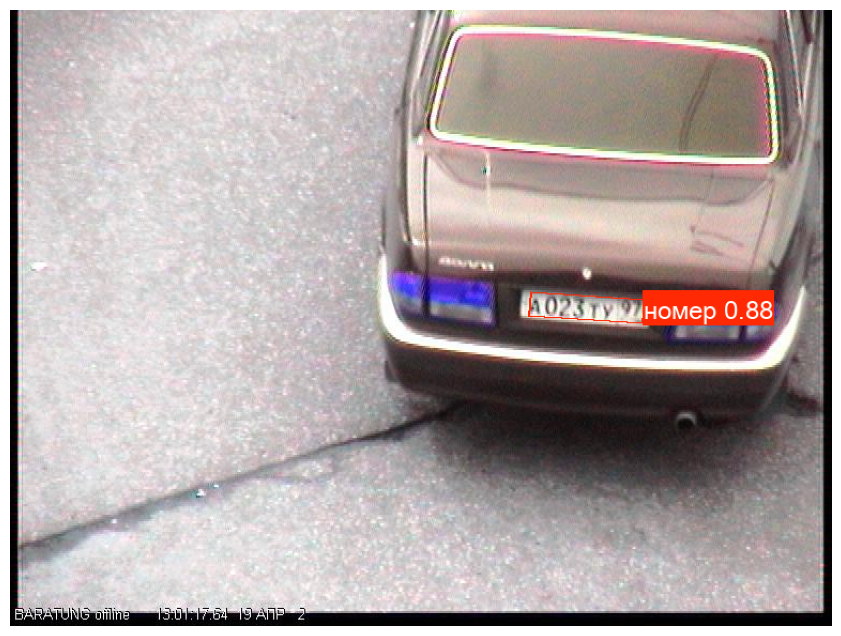

In [28]:
%matplotlib inline
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


# Загрузка модели
model = YOLO("runs/obb/train2/weights/best.pt")

# Путь к изображению
image_path = "img/2.jpg"

# Выполнение инференса
results = model(image_path)

# Получение первого результата
result = results[0]

# Отрисовка детекций
annotated_frame = result.plot()

# Отображение изображения
plt.figure(figsize=(12, 8))
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()

In [1]:
from inference import get_model
import supervision as sv
import cv2

# Задаем путь к изображению для обработки
image_file = "img/car1.jpg"
image = cv2.imread(image_file)

# Загружаем предварительно обученную модель для распознавания номеров
model = get_model(model_id="license-plate-recognition-rxg4e/6")

# Запускаем инференс на выбранном изображении
results = model.infer(image)[0]

# Загружаем результаты инференса в API Supervision Detections
detections = sv.Detections.from_inference(results)

# Создаем аннотаторы для визуализации
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Аннотируем изображение с использованием результатов инференса
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections
)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections
)

# Отображаем изображение
sv.plot_image(annotated_image)


RoboflowAPINotAuthorizedError: Unauthorized access to roboflow API - check API key. Visit https://docs.roboflow.com/api-reference/authentication#retrieve-an-api-key to learn how to retrieve one.